In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv("daft.csv")

In [4]:
data.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


#### Quick peek into the data

In [5]:
data.describe()

,id,price,numBedrooms,numBathrooms,propertySize,AMV_price,sellerId,m_totalImages,longitude,latitude
count,3.967000e+03,3.967000e+03,3967.000000,3967.000000,3612.000000,3967.000000,3.967000e+03,3967.000000,3967.000000,3967.000000
mean,3.629047e+06,3.416734e+05,3.126292,2.077136,132.673865,0.047391,2.163815e+04,18.448954,-7.389964,53.133816
std,2.502479e+05,2.703582e+05,1.230570,1.167772,295.246580,0.212500,2.541506e+05,10.537226,1.865587,0.716435
min,1.092100e+04,2.000000e+04,1.000000,1.000000,1.000000,0.000000,7.000000e+00,0.000000,-100.445882,39.783730
25%,3.654066e+06,1.950000e+05,2.000000,1.000000,78.000000,0.000000,2.178000e+03,12.000000,-8.426627,52.666116
50%,3.673795e+06,2.750000e+05,3.000000,2.000000,103.000000,0.000000,3.255000e+03,17.000000,-7.050391,53.303346
75%,3.685990e+06,3.950000e+05,4.000000,3.000000,137.000000,0.000000,8.806000e+03,23.000000,-6.298945,53.438722
max,3.695402e+06,4.500000e+06,23.000000,23.000000,8600.000000,1.000000,5.310328e+06,104.000000,-6.028016,55.299693


* #### id is not required, we can work with index.
* #### Some features that are in the dataset impact the listing but are not usable for ML, hence will be dropped.

In [6]:
data = data.drop(['id', 'title', 'featuredLevel', 'seller_name', 'category', 'AMV_price', 'm_hasVideo', 'm_hasVirtualTour', 'm_hasBrochure', 'sellerId', 'seller_branch', 'm_totalImages'], axis=1)


### Data Exploration and Preparation

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publishDate   3967 non-null   object 
 1   price         3967 non-null   int64  
 2   numBedrooms   3967 non-null   int64  
 3   numBathrooms  3967 non-null   int64  
 4   propertyType  3967 non-null   object 
 5   propertySize  3612 non-null   float64
 6   sellerType    3967 non-null   object 
 7   ber_rating    3967 non-null   object 
 8   longitude     3967 non-null   float64
 9   latitude      3967 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 310.1+ KB


* #### propertySize is missing around 355 values, which is around 10% of the total, hence dropping the records will impact the performance of our model therefore we need to fill the missing values with mean value.
* #### Date is represented by an object, we need to convert this to DateTime

In [8]:
mean_value = data['propertySize'].mean() 
data['propertySize'].fillna(value=mean_value, inplace=True)

In [9]:
data['publishDate'] = pd.to_datetime(data['publishDate'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publishDate   3967 non-null   datetime64[ns]
 1   price         3967 non-null   int64         
 2   numBedrooms   3967 non-null   int64         
 3   numBathrooms  3967 non-null   int64         
 4   propertyType  3967 non-null   object        
 5   propertySize  3967 non-null   float64       
 6   sellerType    3967 non-null   object        
 7   ber_rating    3967 non-null   object        
 8   longitude     3967 non-null   float64       
 9   latitude      3967 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 310.1+ KB


* #### Data is split in the early phase so that we can analyze the performance of our model (which uses train_data).
* #### Test data will remain untouched until the very end.

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

#### https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583
#### According to this study, the best test to train split ratio is the square root of number of features to 1. We have 18 features which gives us around 4.2:1 , which means the best split is 80/20.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [13]:
train_data = X_train.join(y_train)

In [14]:
train_data.head()

,publishDate,numBedrooms,numBathrooms,propertyType,propertySize,sellerType,ber_rating,longitude,latitude,price
918,2022-01-27,3,3,Semi-D,105.000000,BRANDED_AGENT,B2,-6.331759,53.708680,230000
2915,2022-01-04,2,1,Terrace,41.000000,BRANDED_AGENT,G,-6.940408,52.393338,285000
3023,2022-01-07,4,1,Detached,132.673865,UNBRANDED_AGENT,B2,-8.374749,52.687224,149000
3643,2022-01-19,5,3,Detached,154.000000,BRANDED_AGENT,C1,-6.250254,52.695799,185000
2197,2022-01-30,2,2,Apartment,72.000000,UNBRANDED_AGENT,XXX,-6.109629,53.580376,275000


#### Splitting DateTime to Year, Month and Day

In [15]:
train_data['year'] = train_data['publishDate'].dt.year
train_data['month'] = train_data['publishDate'].dt.month

train_data.drop(['publishDate'], axis=1, inplace = True)

<Axes: >

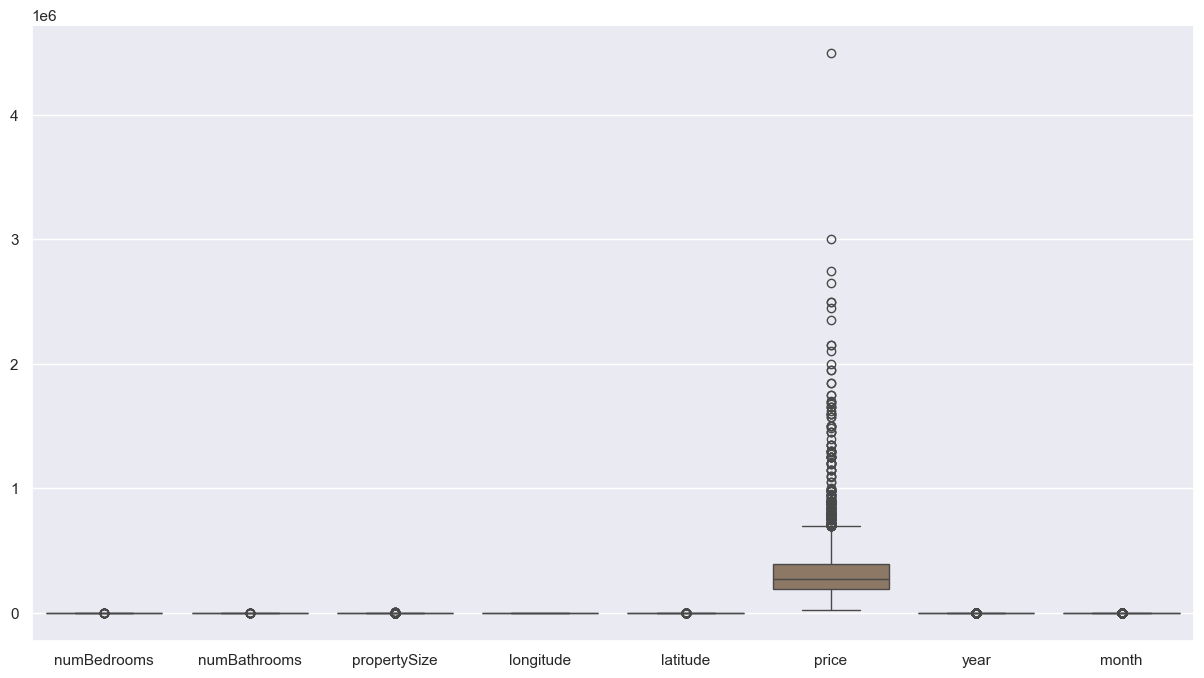

In [16]:
sns.set(rc={"figure.figsize":(15, 8)})
import seaborn as sns
sns.boxplot(train_data)

#### The price feature has outliers but these are not erronous but true outliers because we know that the price of houses varies alot. Hence, instead or removing, these will be normalized. We can further confirm this by plotting the distribution for numeric features. It shows skewness which confirms presence of outliers.

array([[<Axes: title={'center': 'numBedrooms'}>,
        <Axes: title={'center': 'numBathrooms'}>,
        <Axes: title={'center': 'propertySize'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

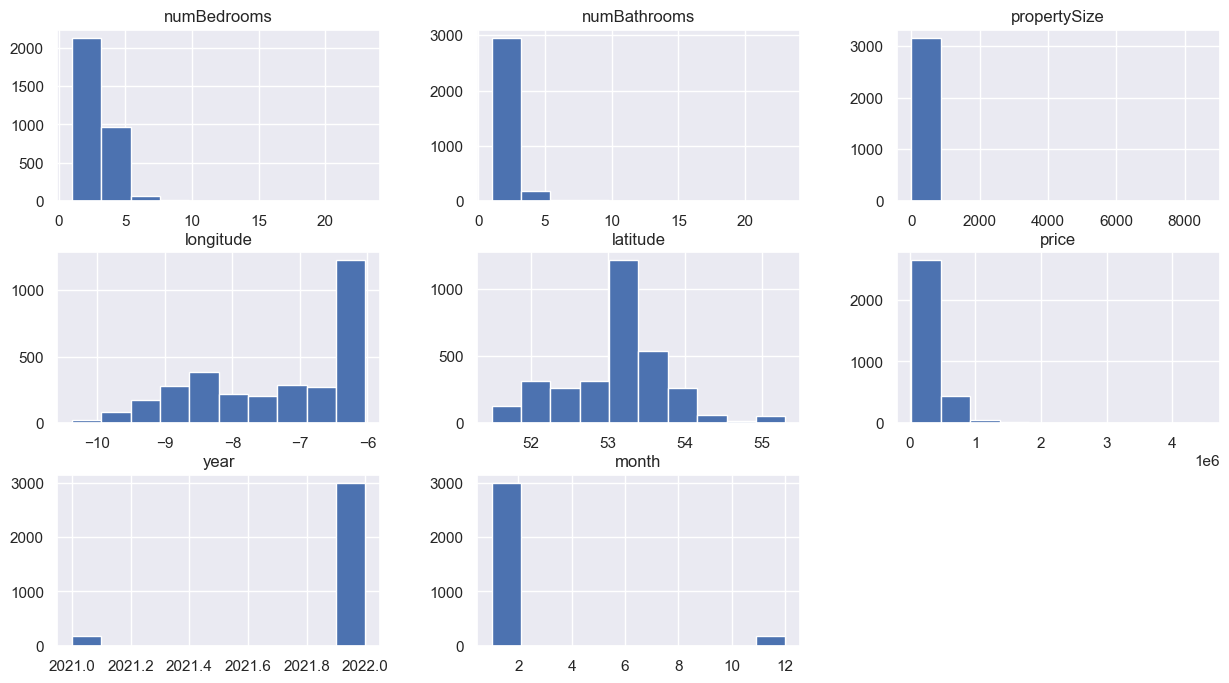

In [17]:
train_data.hist(figsize=(15,8))

#### Data is heavily skewed, by using logarithmic transformation, numBedrooms, numBathrooms, price and propertySize can be transformed into a gaussian curve.

In [18]:
train_data['numBedrooms'] = np.log(train_data['numBedrooms']+1)
train_data['numBathrooms'] = np.log(train_data['numBathrooms']+1)
train_data['propertySize'] = np.log(train_data['propertySize']+1)
train_data['price'] = np.log(train_data['price']+1)
train_data['year'] = np.log(train_data['year']+1)
train_data['month'] = np.log(train_data['month']+1)

array([[<Axes: title={'center': 'numBedrooms'}>,
        <Axes: title={'center': 'numBathrooms'}>,
        <Axes: title={'center': 'propertySize'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

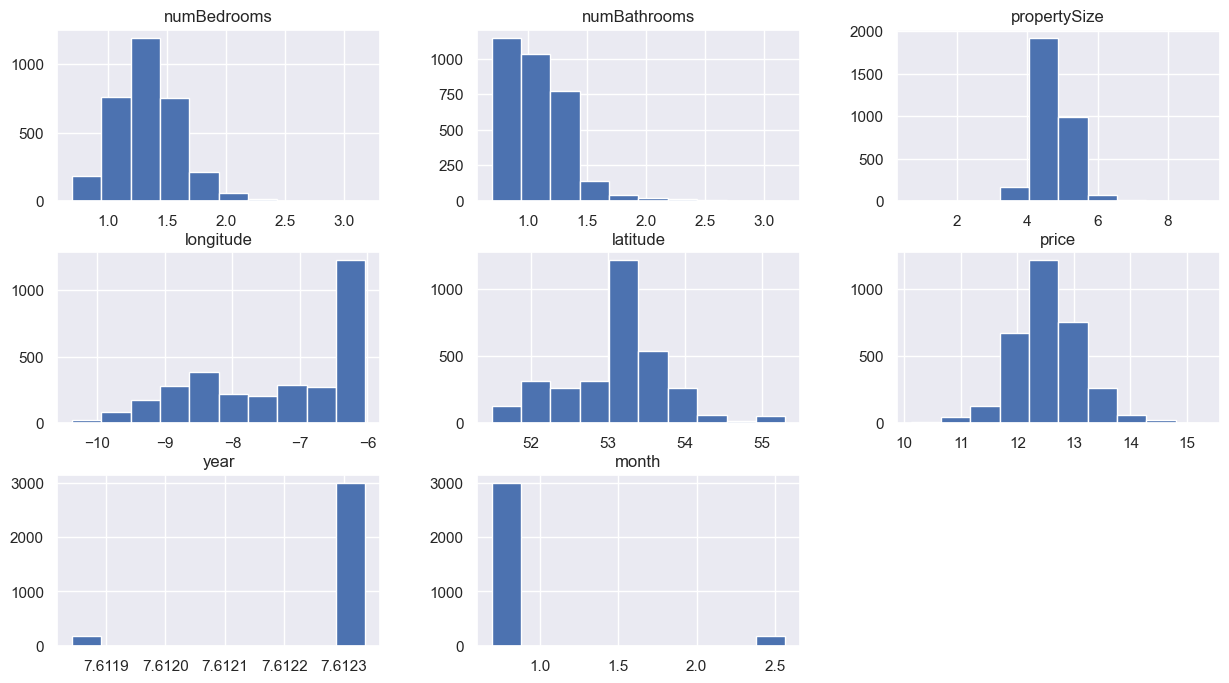

In [19]:
train_data.hist(figsize=(15,8))

<Axes: >

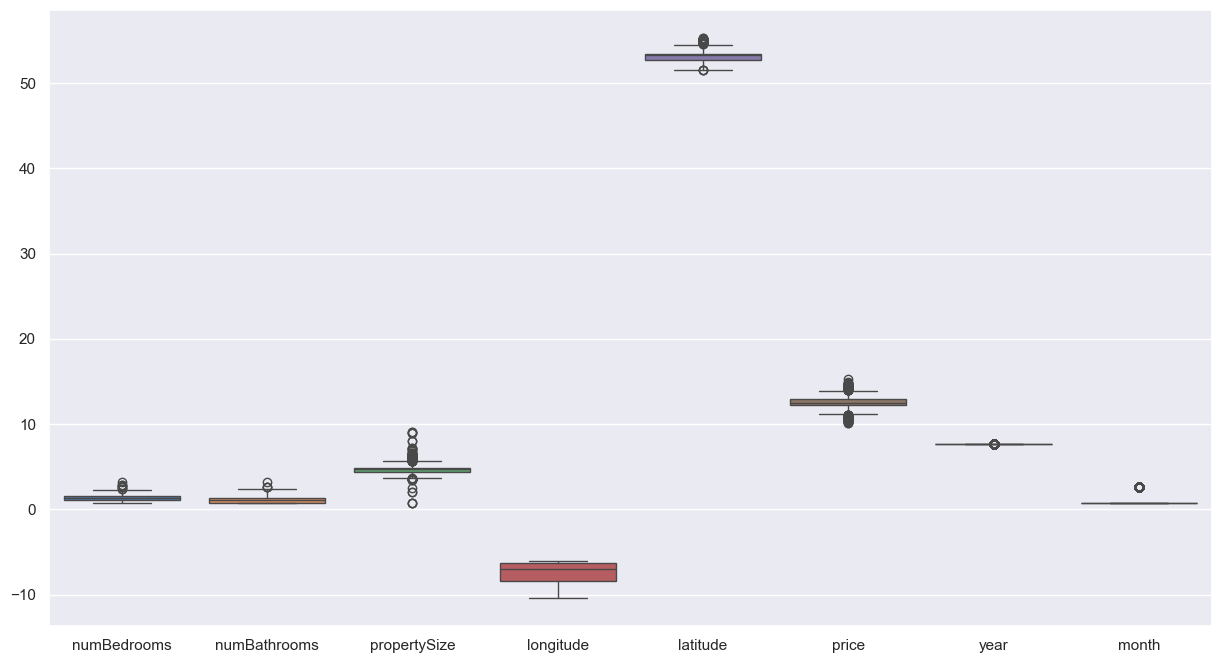

In [20]:
sns.set(rc={"figure.figsize":(15, 8)})
import seaborn as sns
sns.boxplot(train_data)

#### We have the training dataset, we can now perform preprocessing techniques such as encoding, standardizaiton and feature engineering etc.

#### Converting bool to int

In [21]:
train_data.replace({False: 0, True: 1}, inplace=True)

#### Dropping missing energy rating values as these cannot be replaced.

In [22]:
train_data['ber_rating'].value_counts().get('XXX', 0)

135

In [23]:
train_data.drop(train_data[train_data['ber_rating'] == 'XXX'].index, inplace=True)

#### Dealing with High Cardinality in Categorical Features
##### We can see that the amount of unique values is alot for using One Hot Encoding as it will introduce Curse of Dimensionality.
##### Hence, we use simple aggregation to convert all values to 'other' except the 3 most occuring values and then we can use Label Encoding.

In [24]:
train_data['propertyType'].value_counts()

propertyType
Detached          823
Semi-D            732
Apartment         568
Terrace           476
End of Terrace    181
Bungalow          150
Townhouse          47
Duplex             46
Site               14
House               1
Name: count, dtype: int64

In [25]:
train_data['propertyType'].replace(['Terrace', 'End of Terrace', 'Bungalow', 'Townhouse', 'Duplex', 'Site', 'House', 'Studio'], 'Other', inplace=True)

In [26]:
train_data['propertyType'].value_counts()

propertyType
Other        915
Detached     823
Semi-D       732
Apartment    568
Name: count, dtype: int64

In [27]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

train_data['propertyType'] = label_encoder.fit_transform(train_data['propertyType'])

In [28]:
train_data  = pd.get_dummies(train_data, columns = ['sellerType'], dtype=int)

In [29]:
train_data.head()

,numBedrooms,numBathrooms,propertyType,propertySize,ber_rating,longitude,latitude,price,year,month,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
918,1.386294,1.386294,3,4.663439,B2,-6.331759,53.708680,12.345839,7.612337,0.693147,1,0,0
2915,1.098612,0.693147,2,3.737670,G,-6.940408,52.393338,12.560248,7.612337,0.693147,1,0,0
3023,1.609438,0.693147,1,4.895403,B2,-8.374749,52.687224,11.911708,7.612337,0.693147,0,0,1
3643,1.791759,1.386294,1,5.043425,C1,-6.250254,52.695799,12.128117,7.612337,0.693147,1,0,0
681,1.791759,1.609438,2,4.025352,C3,-6.242878,53.344940,12.886644,7.612337,0.693147,0,0,1


#### Encoding Energy Ratings

In [30]:
train_data['ber_rating'].value_counts()

ber_rating
C2        380
C3        366
C1        364
D1        344
D2        277
B3        223
G         197
E1        176
F         153
SI_666    151
E2        144
B2         89
A2         77
A3         73
B1         20
A1          3
A1A2        1
Name: count, dtype: int64

#### Dropping A1A2 as it seems erronous and it is only 1 row

In [31]:
train_data = train_data[train_data.ber_rating != 'A1A2']

In [32]:
train_data['ber_rating'].replace({'A1': 'high', 'A2': 'high', 'A3': 'high', 
                                   'B1': 'med', 'B2': 'med', 'B3': 'med', 
                                   'C1': 'low', 'C2': 'low', 'C3': 'low', 
                                   'D1': 'low', 'D2': 'low', 'D3': 'low', 
                                   'E1': 'low', 'E2': 'low', 'F': 'low', 
                                   'G': 'low', 'SI_666': 'low'}, inplace=True)

In [33]:
train_data['ber_rating'].value_counts()

ber_rating
low     2552
med      332
high     153
Name: count, dtype: int64

In [34]:
train_data  = pd.get_dummies(train_data, columns = ['ber_rating'], dtype=int)

In [35]:
train_data.head()

,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,price,year,month,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT,ber_rating_high,ber_rating_low,ber_rating_med
918,1.386294,1.386294,3,4.663439,-6.331759,53.708680,12.345839,7.612337,0.693147,1,0,0,0,0,1
2915,1.098612,0.693147,2,3.737670,-6.940408,52.393338,12.560248,7.612337,0.693147,1,0,0,0,1,0
3023,1.609438,0.693147,1,4.895403,-8.374749,52.687224,11.911708,7.612337,0.693147,0,0,1,0,0,1
3643,1.791759,1.386294,1,5.043425,-6.250254,52.695799,12.128117,7.612337,0.693147,1,0,0,0,1,0
681,1.791759,1.609438,2,4.025352,-6.242878,53.344940,12.886644,7.612337,0.693147,0,0,1,0,1,0


#### https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d
#### Using clustering to handle latitude and longitude

In [36]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters =5, metric='euclidean', linkage='ward')
train_data['location_cluster'] = agc.fit_predict(train_data[['latitude','longitude']])

In [37]:
train_data.head()

,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,price,year,month,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT,ber_rating_high,ber_rating_low,ber_rating_med,location_cluster
918,1.386294,1.386294,3,4.663439,-6.331759,53.708680,12.345839,7.612337,0.693147,1,0,0,0,0,1,3
2915,1.098612,0.693147,2,3.737670,-6.940408,52.393338,12.560248,7.612337,0.693147,1,0,0,0,1,0,1
3023,1.609438,0.693147,1,4.895403,-8.374749,52.687224,11.911708,7.612337,0.693147,0,0,1,0,0,1,0
3643,1.791759,1.386294,1,5.043425,-6.250254,52.695799,12.128117,7.612337,0.693147,1,0,0,0,1,0,3
681,1.791759,1.609438,2,4.025352,-6.242878,53.344940,12.886644,7.612337,0.693147,0,0,1,0,1,0,3


Text(0.5, 1.0, 'Correlation Heatmap')

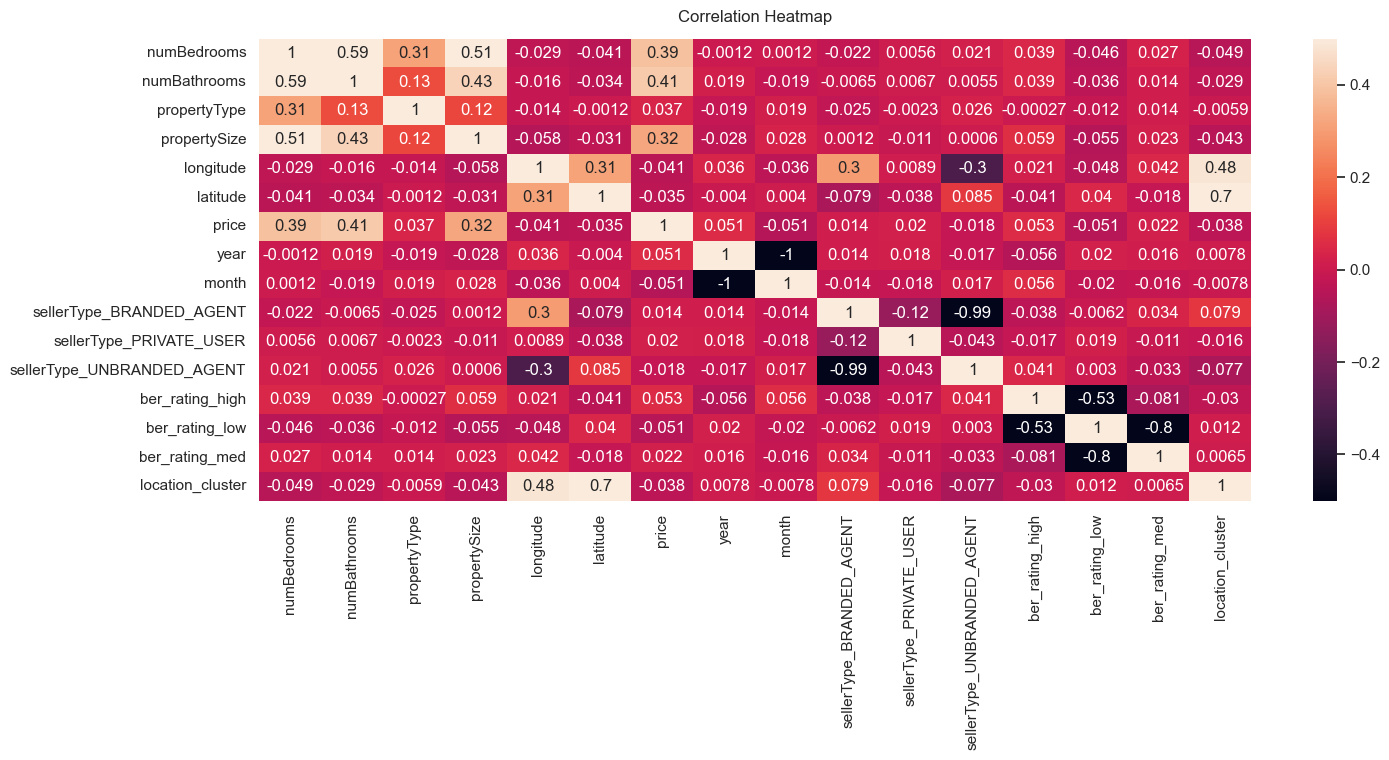

In [38]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_data.corr(), vmin=-0.5, vmax=0.5, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

* #### Price is affected by numBedrooms, numBathrooms, propertyType, propertySize, Year, Energy Ratings (ber) and the type of seller.
* #### Private sellers inflate price the most.
* #### The prices for houses that went up for sale during late times of the year are at lower pirce.
* #### Location cluster impacts the price inversely, the relation is better explained by the map below.

C:\Users\Ali\AppData\Local\Temp\ipykernel_28628\2893345320.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


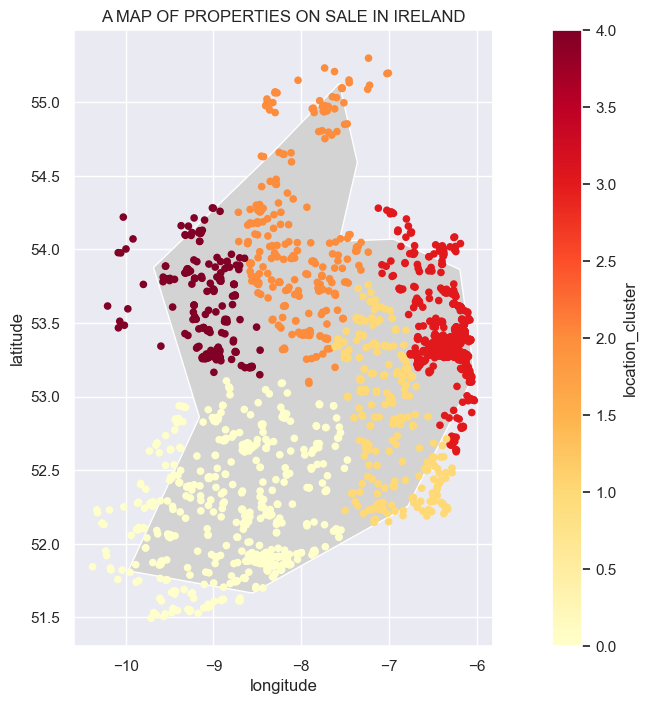

In [39]:
import geopandas as gpd

fig, ax = plt.subplots(figsize=(15,8))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey",
                                                 ax=ax)
# plot points
train_data.plot(x="longitude", y="latitude", kind="scatter", 
        c="location_cluster", colormap="YlOrRd", 
        title="A MAP OF PROPERTIES ON SALE IN IRELAND", 
        ax=ax)

plt.show()

* #### Prices in the south are highest and the lowest in the west of Ireland.

<Axes: xlabel='propertySize', ylabel='price'>

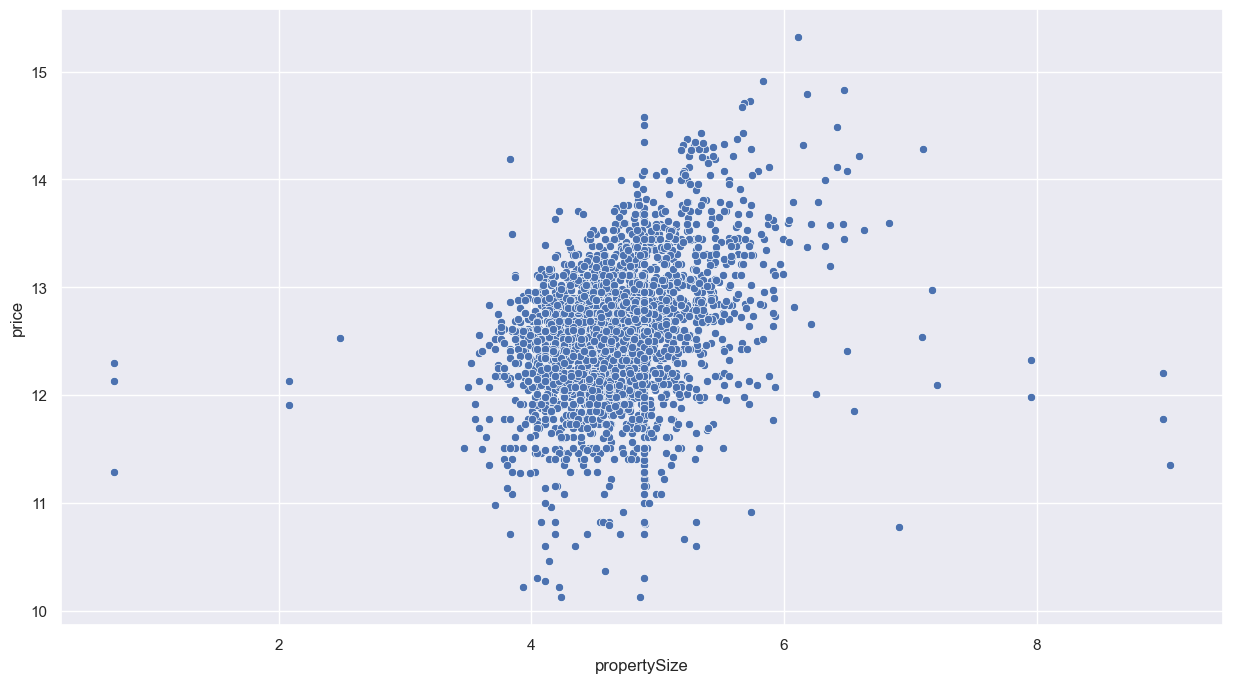

In [46]:
sns.scatterplot(data=train_data, x="propertySize", y="price")

#### Majority of the values form a cluster, we can deduce that property Size and the price has a strong correlation

#### 